In [2]:
import pyautogui as pag
from pathlib import Path
import subprocess
import time

In [3]:
# pyautogui의 안전장치 기능 -> 마우스 커서를 모퉁이로 갖다 놓으면 FailSafeException 예외 발생
# pyautogui 마우스 기능은 x, y 좌표 사용 -> 원점(화면 좌상단)이 (0, 0)
# pag.size()를 통해 전체 크기 파악 -> 네임드 튜플 반환
wh = pag.size()
wh[0], wh[1], wh.width, wh.height

(1920, 1080, 1920, 1080)

In [4]:
# moveTo(x, y, duration='') 함수를 통해 마우스 움직이기 -> 절대 위치
for i in range(3):
    pag.moveTo(100, 100, duration=0.1)
    pag.moveTo(200, 100, duration=0.1)
    pag.moveTo(200, 200, duration=0.1)
    pag.moveTo(100, 200, duration=0.1)

In [5]:
# move(x, y, duration='') 함수를 통해 마우스 움직이기 -> 현재 위치 대비 상대 위치
for i in range(3):
    pag.move(100, 0, duration=0.1)
    pag.move(0, 100, duration=0.1)
    pag.move(-100, 0, duration=0.1)
    pag.move(100, -100, duration=0.1)

In [6]:
# position() 함수를 통해 마우스 현재 위치 파악 -> 네임드 튜플 반환
pag.position()

Point(x=400, y=200)

In [7]:
# click(x, y, button='') 함수를 통해 마우스 클릭 가능
# doubleClick() 함수 사용 가능
# click은 mouseUp()과 mouseDown()의 결합
p = pag.position()
pag.click(p, button='right')

In [8]:
# dragTo(x, y, duration='') 함수를 통해 마우스 드래그 -> 절대 위치
# drag(x, y, duration='') 함수를 통해 마우스 움직이기 -> 현재 위치 대비 상대 위치
paintProc = subprocess.Popen(Path('C:/') / 'Windows' / 'System32' / 'mspaint.exe')
time.sleep(1)
# 클릭하여 창을 활성화
pag.click()
distance = 300
change = 20
while distance > 0:
    pag.drag(distance, 0, duration=0.2)
    distance -= change
    pag.drag(0, distance, duration=0.2)
    distance -= change
    pag.drag(-distance, 0, duration=0.2)
    distance -= change
    pag.drag(0, -distance, duration=0.2)
    distance -= change

In [9]:
# scroll() 함수를 통해 마우스 상하 스크롤 -> 양수는 위로, 음수는 아래로
pag.scroll(-500)

In [10]:
# mouseInfo() 함수를 이용하여 마우스 인포 창 호출 가능
pag.mouseInfo()
time.sleep(1)
pag.click()

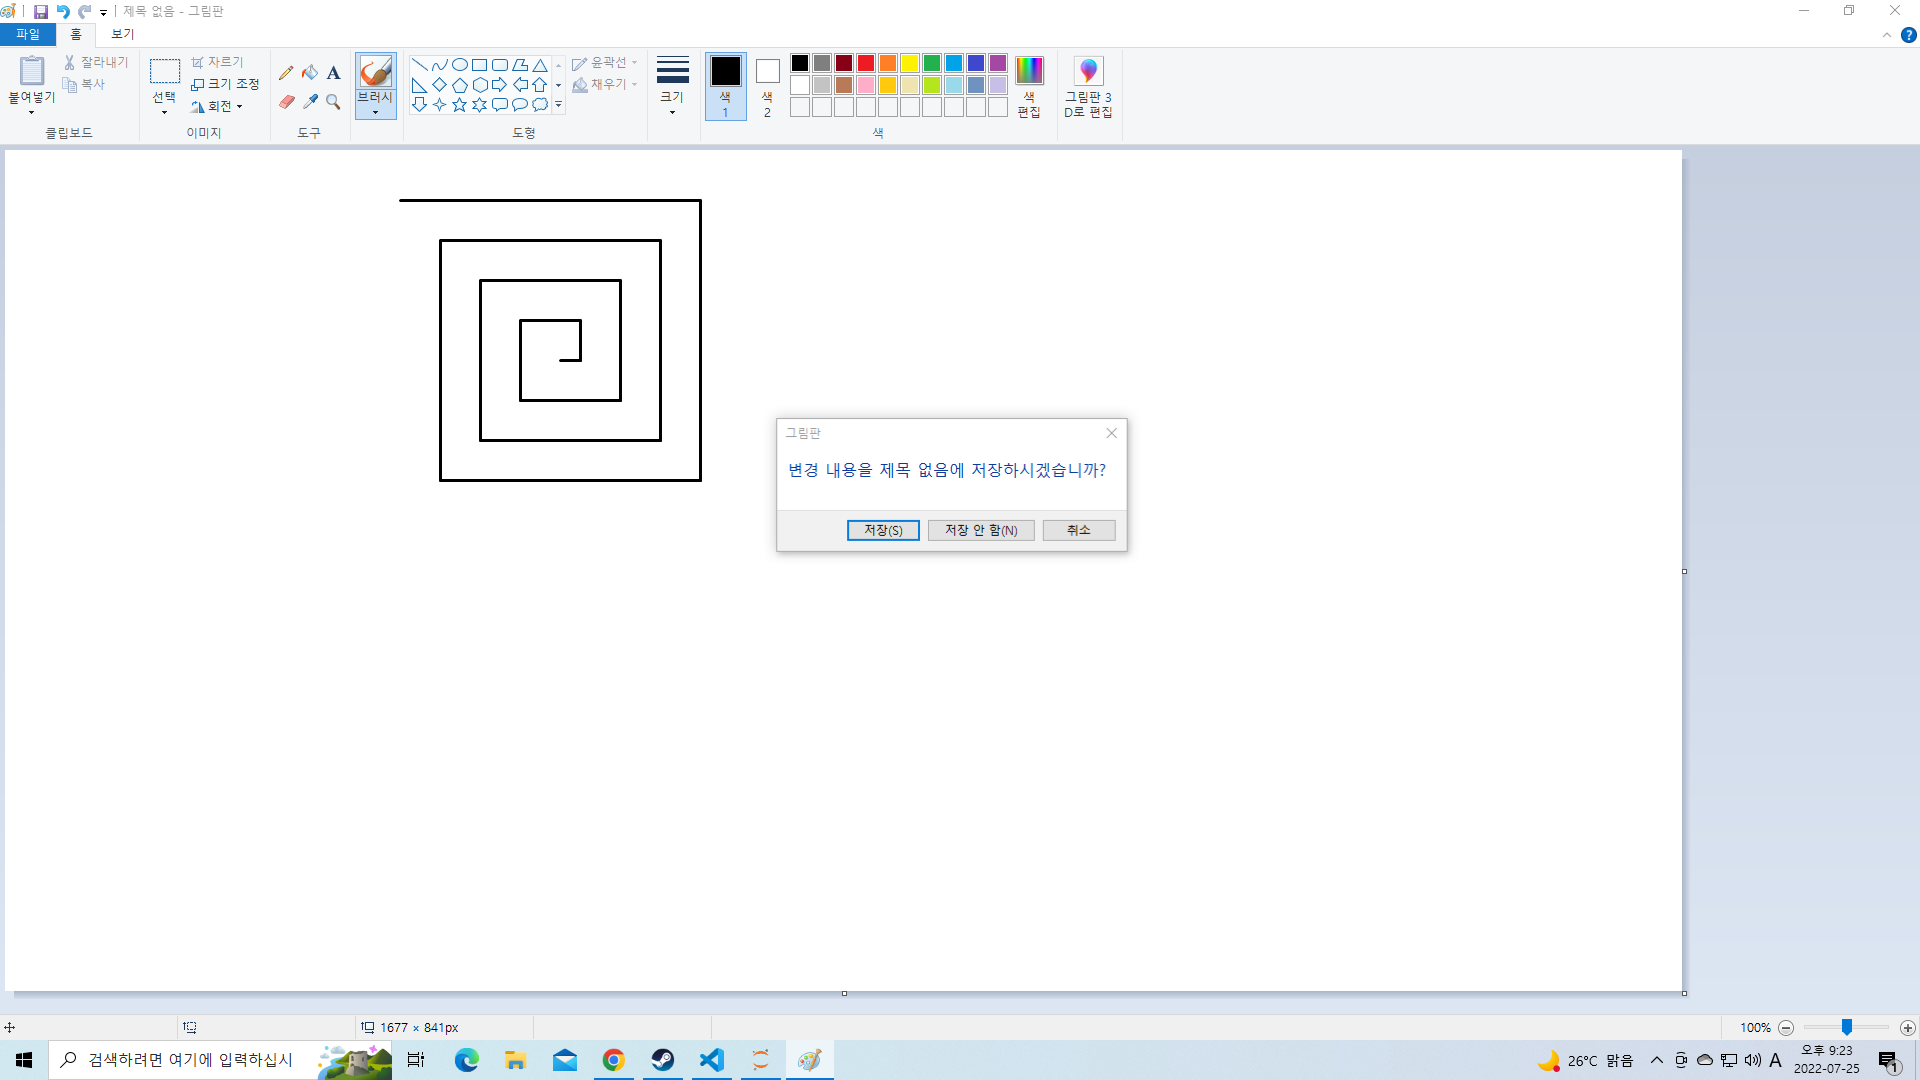

In [11]:
# screenshot() 함수를 통해 스크린샷 가능
pag.screenshot()

In [16]:
# pixel() 함수를 통해 RGB 파악 가능 -> 인자 두개(x, y)를 넣어야
pag.pixel(500, 500)
position = pag.position()
pag.pixel(position.x, position.y)
# pixelMatchesColor() 함수를 통해 일치 여부 확인 -> 인자 세개(x, y, (r, g, b))
pag.pixelMatchesColor(position.x, position.y, (10, 10, 30))

False

In [25]:
# 이미지 인식: locateOnScreen() 함수를 통해 이미지를 찾아낸 좌표를 반환
# locateAllOnScreen() 함수를 통해 튜플들이 들어 있는 리스트도 반환 가능
# 단, locateOnScreen()은 Path 객체 활용 불가능
p1 = Path.cwd() / 'attachments' / 'submit.png'
locate = pag.locateOnScreen(str(p1))
# 왼쪽 모서리 x좌표, 위쪽 모서리 y좌표, 너비, 높이 반환
locate
# click() 함수에 이미지 파일 직접 전달도 가능 + moveTo(), dragTo()도 가능
# 단, 이미지와 일치하는게 없으면 오류 발생 -> 예외처리 필요
pag.click(locate)

In [29]:
# 활성화된 Window 객체 생성 가능 -> getActiveWindow() 함수
pag.getActiveWindow()
# 모든 Window 객체를 리스트로 생성 가능 -> getAllWindows() 함수
pag.getAllWindows()
# 문자열로 변환하면 left, top, width, height, title 등 출력 가능
str(pag.getActiveWindow())

'<Win32Window left="-8", top="-8", width="1936", height="1056", title="● Python_automate_1_chapter20.ipynb - python_automate - Visual Studio Code">'

In [47]:
# getWindowsWithTitle() 함수를 통해 title 문자열 일부를 지정하여 해당 Window 객체들을 리스트로 생성
pag.getWindowsWithTitle('Visual')
# getAllTitles() 함수로 getAllWindows()에 해당하는 title 확인 가능 -> zip() 함수를 통해 연계
pag.getAllTitles()

['',
 '● Python_automate_1_chapter20.ipynb - python_automate - Visual Studio Code',
 'NAVER - Chrome',
 'Jupyter Notebook (anaconda3)',
 'Microsoft Text Input Application',
 '',
 'Groove 음악',
 'Groove 음악',
 '계산기',
 '계산기',
 'Steam 로그인',
 '',
 '',
 '',
 '',
 'Program Manager']

In [49]:
paintProc = subprocess.Popen(Path('C:/') / 'Windows' / 'System32' / 'mspaint.exe')
time.sleep(3)
# '그림판'으로만 하면 제대로 안나오는듯..
fw = pag.getWindowsWithTitle('제목 없음 - 그림판')[0]
# width, topleft 메서드를 통해 너비, 위치 등 확인 가능
fw.width, fw.topleft
# topleft 메서드를 수정하면서 위치 이동 가능
fw.topleft = (200, 200)
# isActive 메서드를 통해 활성화 여부 확인 + isMAximized, isMinimized 등 가능
fw.isActive
fw.activate()
time.sleep(3)
# minimize() 메서드를 통해 최소화 가능 + maximize(), restore()(최대/최소화 동작을 실행 취소), close() 등 활용 가능
fw.close()

In [55]:
csvProc = subprocess.Popen(Path('C:/') / 'Windows' / 'notepad.exe')
time.sleep(1)
fw = pag.getWindowsWithTitle('메모장')[0]
fw.activate()
# 키보드에서 문자열 전송 -> write() 함수 이용
pag.write('Hello world!', 0.2)
time.sleep(1)
# press() 함수를 통해 키보드 누르기 가능 -> keyDown()과 keyUp() 함수의 결합
# hotkey() 함수로 단축키 형태로 사용 가능 -> pyperclip과도 연계 가능
pag.hotkey('ctrl', 'a')
time.sleep(1)
pag.hotkey('ctrl', 'c')
time.sleep(1)
fw.close()
time.sleep(1)
# 메모장을 저장하지 않고 종료하기 위해 옆으로 이동 후 엔터 -> 리스트 안에 단어를 넣는 형식으로 가능
# 'enter', 'esc', 'shift', 'ctrl', 'tab', 'backspace', 'delete', 'pageup', 'home', 'end', 'left', 'capslock', 'volumedown', 'insert', 'printscreen' 등
pag.write(['right', 'enter'])

In [57]:
# 화면에 메시지 상자 출력 -> alert(), confirm(), prompt(), password() 함수 이용
# 첫 번째 인자는 메시지 상자 내 내용, 두 번째 선택 인자는 제목 표시줄에 들어가는 제목
pag.password('What is the password', 'Important')

'hi'